# Análisis exploratorio de datos (EDA) de Sistema de bicicletas compartidas - 2011

<div align="center">
  <img src="./img/nombreCapitalBikeshare.png" alt="Nombre de la empresa de bicicletas compartidas" width="500px" />
</div>

**Introducción**

*En este proyecto, llevaremos a cabo un análisis exploratorio de datos utilizando Python. Utilizaremos información proveniente de la biblioteca de datos UC Irvine Machine Learning Repository sobre el sistema de bicicletas compartidas del año 2011. Este conjunto de datos contiene variables como la temperatura, fechas y tipos de clientes, entre otros.*

*El objetivo principal de este análisis será comprender mejor el comportamiento de los usuarios del sistema de bicicletas compartidas en función de diversas variables y extraer información relevante que pueda ser útil para la toma de decisiones.*

*Para llevar a cabo este análisis, seguiremos los siguientes pasos:*

- **Adquisición de datos:** Descargaremos el conjunto de datos del repositorio de UC Irvine Machine Learning Repository o cualquier otra fuente confiable que contenga información sobre el sistema de bicicletas compartidas del año 2011.

- **Preparación de datos:** Realizaremos tareas de limpieza de datos, como el manejo de valores faltantes y el manejo de duplicados, para asegurarnos de que los datos estén completos y sin redundancias, lo que garantizará la calidad de nuestros análisis subsiguientes.

- **Análisis exploratorio:** Utilizaremos diversas técnicas y herramientas de visualización, como gráficos de dispersión, histogramas y diagramas de caja, para explorar las relaciones entre las variables y comprender la distribución de los datos. Esto nos permitirá identificar patrones, anomalías y posibles correlaciones entre las variables del conjunto de datos.

- **Análisis de tendencias:** Identificaremos tendencias temporales y estacionales mediante el análisis de series temporales y la aplicación de técnicas como la suavización exponencial y el análisis de estacionalidad. También estudiaremos otras tendencias relevantes en los datos, como cambios en el comportamiento de los usuarios en función de variables específicas como la temperatura o el día de la semana.

*Al finalizar este proyecto, esperamos tener una comprensión más profunda del sistema de bicicletas compartidas del año 2011 y poder extraer información valiosa que pueda ser utilizada para mejorar su funcionamiento y eficiencia.*

## Hipótesis

**Hipótesis 1**:
Existe una diferencia significativa en el uso promedio de bicicletas entre estaciones cálidas (primavera y verano) y estaciones frías (invierno y otoño).

**Hipótesis 2**:
Existe una diferencia en el promedio de uso entre las estaciones cálidas.

**Hipótesis 3**:
Existe una diferencia en el promedio de uso entre las estaciones frías.

**Hipótesis 4**:
¿Cómo se manifiesta el comportamiento por tipo de clientes durante la temporada de mayor actividad?

**Hipótesis 5**:
¿Cómo se refleja el comportamiento por tipo de clientes durante la temporada de menor actividad?

**Hipótesis 6**:
¿Cómo varía el uso promedio de bicicletas mensualmente durante la temporada de mayor actividad?

**Hipótesis 7**:
¿Cómo varía el uso promedio de bicicletas mensualmente durante la temporada de menor actividad?

**Hipótesis 8**:
¿Cómo se comporta el uso promedio de bicicletas por tipo de clientes durante los días de la semana de nuestra temporada de mayor frecuencia?

**Hipótesis 9**:
¿Cómo se comporta el uso promedio de bicicletas por tipo de clientes durante los días de la semana de nuestra temporada de menor frecuencia?

### *Importamos librerías*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from utils.mis_funciones import grafico_univariante, grafico_bivariante, cardinalidad

#VARIABLES

ALPHA = 0.05

### *Importamos el Dataset*

In [2]:
df2011 = pd.read_csv('data/final/Dataset_clear_2011.csv', parse_dates=['dteday'], index_col='instant') # Aplicamos como a la columna "dteday" el tipo fecha
df2011.head()

,dteday,season,mnth,day,hr,weekday,holiday,workingday,temperature,thermal_sensation,humidity,weathersit,wind_speed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,1,1,0,5,0,0,10.0,14.0,81.0,1,0.0,3,13,16
2,2011-01-01,1,1,1,1,5,0,0,9.0,14.0,80.0,1,0.0,8,32,40
3,2011-01-01,1,1,1,2,5,0,0,9.0,14.0,80.0,1,0.0,5,27,32
4,2011-01-01,1,1,1,3,5,0,0,10.0,14.0,75.0,1,0.0,3,10,13
5,2011-01-01,1,1,1,4,5,0,0,10.0,14.0,75.0,1,0.0,0,1,1


##### *Información del DataFrame*

| Nombre de columna | Descripción                                                                                     |
|-------------------|-------------------------------------------------------------------------------------------------|
| instant           | Índice del registro.                                                                           |
| dteday            | Fecha.                                                                                          |
| season            | Estación (1: invierno, 2: primavera, 3: verano, 4: otoño).                                      |
| yr                | Año (0: 2011, 1: 2012).                                                                        |
| mnth              | Mes (1 a 12).                                                                                   |
| hr                | Hora (0 a 23).                                                                                  |
| holiday           | Día festivo (si el día es festivo o no).                                                        |
| weekday           | Día de la semana (0 a 6).                                                                       |
| workingday        | Si el día es laborable (1 si el día no es fin de semana ni festivo, de lo contrario 0).          |
| weathersit        | Situación meteorológica en el momento de la observación.                                          |
| temp              | Temperatura normalizada en Celsius.                                                              |
| atemp             | Sensación térmica normalizada en Celsius.                                                        |
| hum               | Humedad normalizada.                                                                            |
| windspeed         | Velocidad del viento normalizada.                                                               |
| casual            | Conteo de usuarios casuales.                                                                    |
| registered        | Conteo de usuarios registrados.                                                                 |
| cnt               | Conteo total de bicicletas alquiladas, incluyendo usuarios casuales y registrados.                |



In [3]:
print(f'La base de datos a analizar posee {df2011.shape[0]} filas y {df2011.shape[1]} columnas')
print(f'\nLas features que tenemos son: {list(df2011.columns)}')

La base de datos a analizar posee 8645 filas y 16 columnas

Las features que tenemos son: ['dteday', 'season', 'mnth', 'day', 'hr', 'weekday', 'holiday', 'workingday', 'temperature', 'thermal_sensation', 'humidity', 'weathersit', 'wind_speed', 'casual', 'registered', 'cnt']


### *Primera exploración*

In [4]:
df2011.tail()

,dteday,season,mnth,day,hr,weekday,holiday,workingday,temperature,thermal_sensation,humidity,weathersit,wind_speed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
8641,2011-12-31,1,12,31,19,5,0,0,17.0,21.0,54.0,1,15.0,19,73,92
8642,2011-12-31,1,12,31,20,5,0,0,17.0,21.0,54.0,1,15.0,8,63,71
8643,2011-12-31,1,12,31,21,5,0,0,16.0,20.0,58.0,1,13.0,2,50,52
8644,2011-12-31,1,12,31,22,5,0,0,16.0,20.0,62.0,1,9.0,2,36,38
8645,2011-12-31,1,12,31,23,5,0,0,15.0,19.0,66.0,1,0.0,4,27,31


In [5]:
df2011.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8645 entries, 1 to 8645
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   dteday             8645 non-null   datetime64[ns]
 1   season             8645 non-null   int64         
 2   mnth               8645 non-null   int64         
 3   day                8645 non-null   int64         
 4   hr                 8645 non-null   int64         
 5   weekday            8645 non-null   int64         
 6   holiday            8645 non-null   int64         
 7   workingday         8645 non-null   int64         
 8   temperature        8645 non-null   float64       
 9   thermal_sensation  8645 non-null   float64       
 10  humidity           8645 non-null   float64       
 11  weathersit         8645 non-null   int64         
 12  wind_speed         8645 non-null   float64       
 13  casual             8645 non-null   int64         
 14  registered   

In [6]:
df2011.describe()

,dteday,season,mnth,day,hr,weekday,holiday,workingday,temperature,thermal_sensation,humidity,weathersit,wind_speed,casual,registered,cnt
count,8645,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000
mean,2011-07-03 09:29:50.213996800,2.513592,6.573973,15.665240,11.573626,3.009485,0.027646,0.683748,20.035049,23.453788,64.342973,1.437594,12.808213,28.581608,115.193869,143.794448
min,2011-01-01 00:00:00,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-04-04 00:00:00,2.000000,4.000000,8.000000,6.000000,1.000000,0.000000,0.000000,13.000000,16.000000,49.000000,1.000000,7.000000,3.000000,26.000000,31.000000
50%,2011-07-04 00:00:00,3.000000,7.000000,16.000000,12.000000,3.000000,0.000000,1.000000,20.000000,24.000000,65.000000,1.000000,13.000000,14.000000,90.000000,109.000000
75%,2011-10-02 00:00:00,3.000000,10.000000,23.000000,18.000000,5.000000,0.000000,1.000000,27.000000,31.000000,81.000000,2.000000,19.000000,38.000000,168.000000,211.000000
max,2011-12-31 00:00:00,4.000000,12.000000,31.000000,23.000000,6.000000,1.000000,1.000000,39.000000,50.000000,100.000000,4.000000,57.000000,272.000000,567.000000,651.000000
std,NaN,1.105477,3.428147,8.793108,6.907822,2.000845,0.163966,0.465040,8.126433,8.851484,19.629328,0.653859,8.253896,38.807847,109.461014,133.797854


In [7]:
df2011.isnull().sum()

dteday               0
season               0
mnth                 0
day                  0
hr                   0
weekday              0
holiday              0
workingday           0
temperature          0
thermal_sensation    0
humidity             0
weathersit           0
wind_speed           0
casual               0
registered           0
cnt                  0
dtype: int64

In [8]:
df2011.duplicated(keep=False).sum()

0

*Podemos observar que nuestro DataFrame no contiene valores nulos ni duplicados. Sin embargo, al analizar los valores máximos de clientes, notamos que se alejan considerablemente del tercer cuartil (Q3). Esto sugiere que podrían existir valores atípicos que podrían afectar nuestro análisis. Por lo tanto, sería prudente revisar más a fondo estos valores para determinar si son errores en los datos o si realmente representan casos excepcionales que deben ser considerados en nuestro análisis.*

*Esta revisión adicional nos permitirá asegurarnos de la calidad de los datos y evitar sesgos o interpretaciones incorrectas en nuestro análisis.*

### *Análisis exploratorio de datos.*

*El análisis univariante se realiza para comprender la distribución y características de una variable específica en un conjunto de datos. Se centra en examinar una sola variable a la vez, sin considerar la relación con otras variables. Se utilizan gráficos como boxplots e histogramas con el fin de obtener una descripción visual y numérica de la distribución de los datos, lo que nos proporciona información importante sobre la tendencia central, la dispersión, la presencia de valores atípicos y la forma de la distribución.*

- **Boxplot (Diagrama de caja):** Este gráfico muestra la distribución de los datos a través de cuartiles, resaltando la mediana, los valores atípicos y la dispersión de los datos. Es útil para identificar la presencia de valores extremos y comparar la distribución de una variable entre diferentes categorías.

<br>

<div align="center">
  <img src="./img/boxplot-esquema.png" alt="Breve explicación de un boxplot" width="500px" />
</div>

<br>

- **Histograma:** Este gráfico representa la frecuencia de ocurrencia de diferentes valores o rangos de valores en una variable. Divide el rango de valores en intervalos y muestra la frecuencia de observaciones dentro de cada intervalo. Es útil para visualizar la forma de la distribución de los datos, como si son simétricos, sesgados a la izquierda o a la derecha, o bimodales.

<br>

<div align="center">
  <img src="./img/histograma-asimetrico.png" alt="Breve explicación de un histograma sesgado" width="600px" />
</div>

<br>

*Ambos tipos de gráficos proporcionan información valiosa sobre la distribución de los datos, lo que ayuda a detectar patrones, identificar valores atípicos y comprender mejor la naturaleza de la variable en cuestión. Esto es fundamental para realizar un análisis exploratorio de datos sólido y fundamentar decisiones analíticas posteriores.*

La distribución es platicúrtica con una curtosis de -0.99. Los datos se encuentran dispersos.
La distribución se encuentra sesgada hacia la derecha -0.0.


,count,mean,median,mode,std,min,25%,50%,75%,max,kurtosis,skewness
temperature,8645.0,20.035049,20.0,25.0,8.13,1.0,13.0,20.0,27.0,39.0,-0.99,-0.0


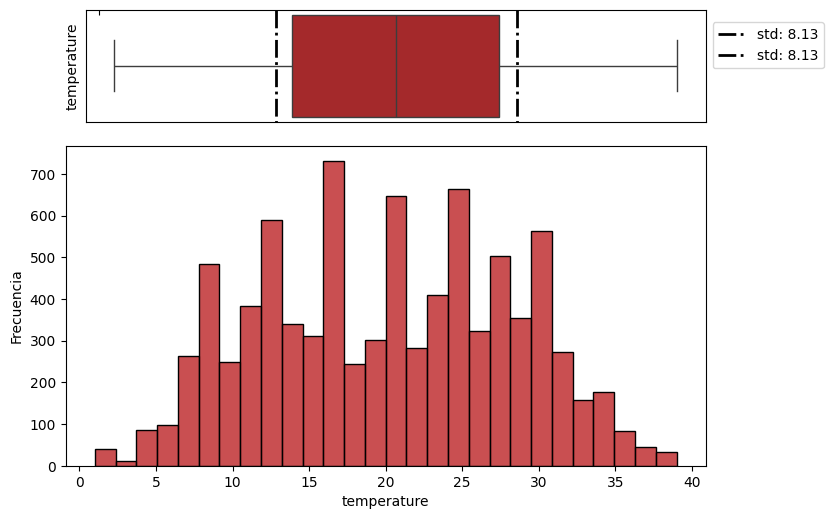

In [9]:
grafico_univariante(df2011,'temperature', color_boxplot='#b81417', color_hist='#b81417')

La distribución es platicúrtica con una curtosis de -0.88. Los datos se encuentran dispersos.
La distribución se encuentra sesgada hacia la derecha -0.08.


,count,mean,median,mode,std,min,25%,50%,75%,max,kurtosis,skewness
thermal_sensation,8645.0,23.453788,24.0,33.0,8.85,0.0,16.0,24.0,31.0,50.0,-0.88,-0.08


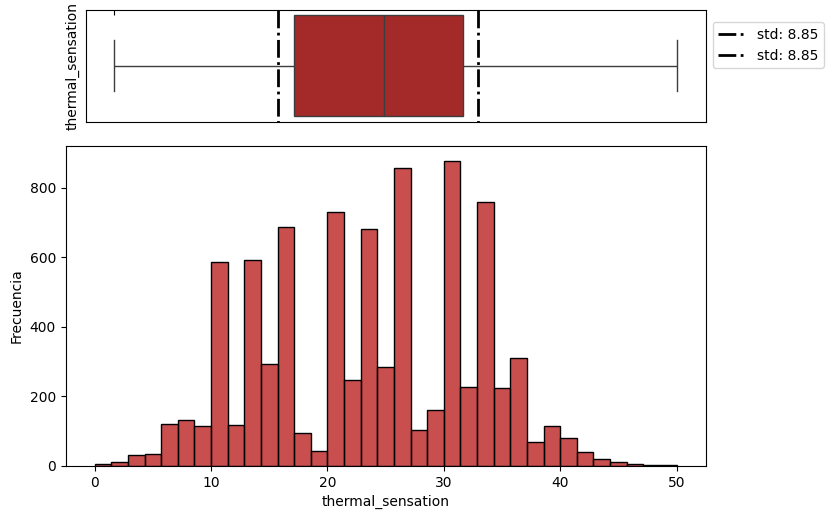

In [10]:
grafico_univariante(df2011,'thermal_sensation')

La distribución es leptocúrtica con una curtosis de 0.57. Los datos se encuentran concentrados alrededor de la media.
La distribución se encuentra sesgada hacia la izquierda 0.55.


,count,mean,median,mode,std,min,25%,50%,75%,max,kurtosis,skewness
wind_speed,8645.0,12.808213,13.0,0.0,8.25,0.0,7.0,13.0,19.0,57.0,0.57,0.55


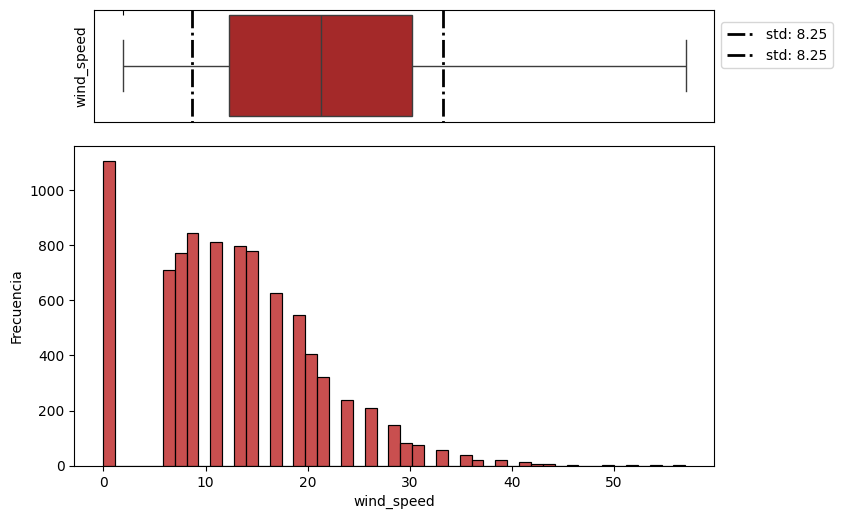

In [11]:
grafico_univariante(df2011,'wind_speed')

La distribución es leptocúrtica con una curtosis de 6.51. Los datos se encuentran concentrados alrededor de la media.
La distribución se encuentra sesgada hacia la izquierda 2.38.


,count,mean,median,mode,std,min,25%,50%,75%,max,kurtosis,skewness
casual,8645.0,28.581608,14.0,0,38.81,0.0,3.0,14.0,38.0,272.0,6.51,2.38


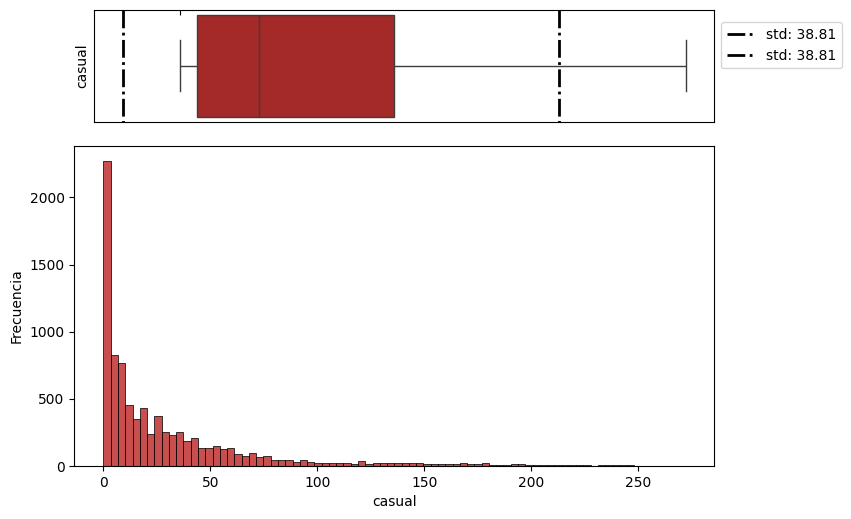

In [12]:
grafico_univariante(df2011,'casual')

La distribución es leptocúrtica con una curtosis de 1.93. Los datos se encuentran concentrados alrededor de la media.
La distribución se encuentra sesgada hacia la izquierda 1.39.


,count,mean,median,mode,std,min,25%,50%,75%,max,kurtosis,skewness
registered,8645.0,115.193869,90.0,4,109.46,0.0,26.0,90.0,168.0,567.0,1.93,1.39


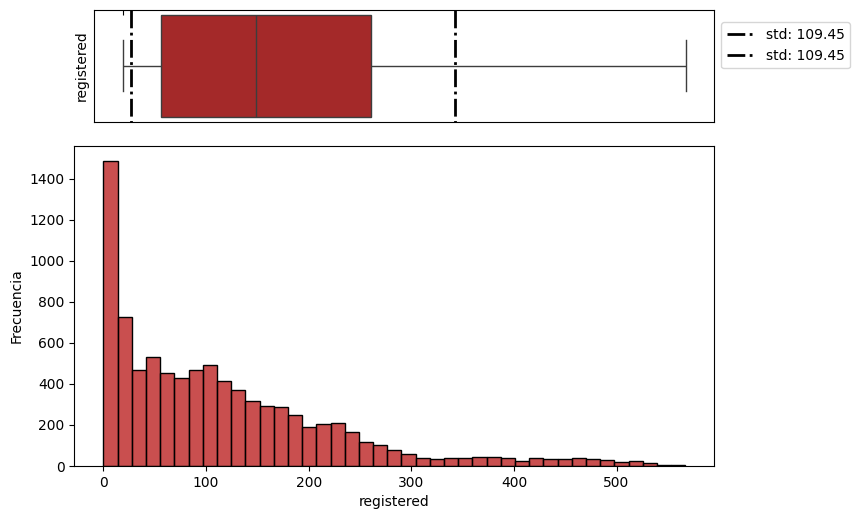

In [13]:
grafico_univariante(df2011,'registered')

La distribución es leptocúrtica con una curtosis de 0.76. Los datos se encuentran concentrados alrededor de la media.
La distribución se encuentra sesgada hacia la izquierda 1.13.


,count,mean,median,mode,std,min,25%,50%,75%,max,kurtosis,skewness
cnt,8645.0,143.794448,109.0,5,133.8,1.0,31.0,109.0,211.0,651.0,0.76,1.13


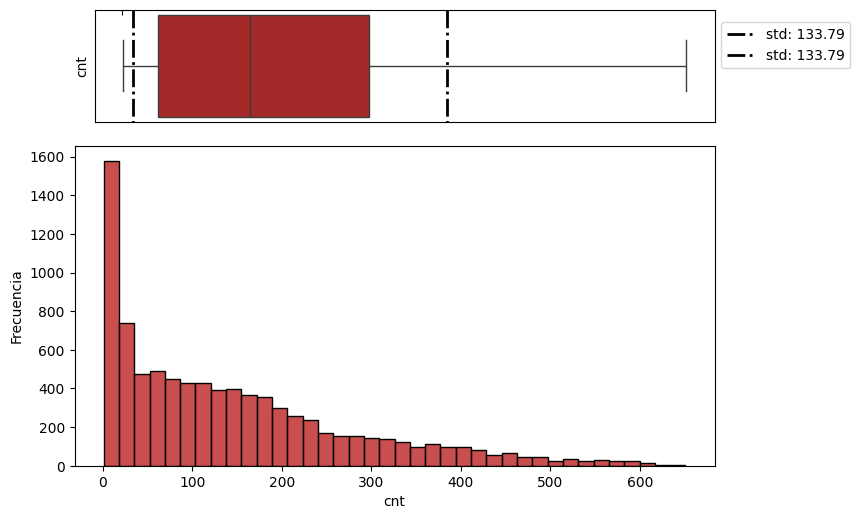

In [14]:
grafico_univariante(df2011,'cnt')

#### *Análisis bivariante*

*El análisis bivariante se utiliza para examinar la relación entre dos variables en un conjunto de datos. Ayuda a comprender cómo cambia una variable cuando cambia otra y si existe alguna asociación o correlación entre ellas* 

*Algunas razones clave por las que utilizamos el análisis bivariante son:*

- **Identificar relaciones:** Nos permite identificar relaciones o patrones entre dos variables, lo que puede ayudar a comprender mejor el fenómeno que estamos estudiando. Por ejemplo, podríamos investigar cómo la temperatura afecta la demanda de bicicletas compartidas.

- **Validar hipótesis:** Nos permite validar hipótesis sobre la relación entre las variables. Por ejemplo, podríamos tener la hipótesis de que hay una relación positiva entre la temperatura y el número de bicicletas alquiladas en un día determinado.

- **Predecir comportamientos:** Nos ayuda a predecir el comportamiento de una variable en función de otra. Por ejemplo, podríamos intentar predecir el número de bicicletas alquiladas en función de la temporada del año.

- **Identificar correlaciones:** Nos permite calcular medidas de correlación entre las variables, como el coeficiente de correlación de Pearson, que nos indican la fuerza y la dirección de la relación entre ellas.


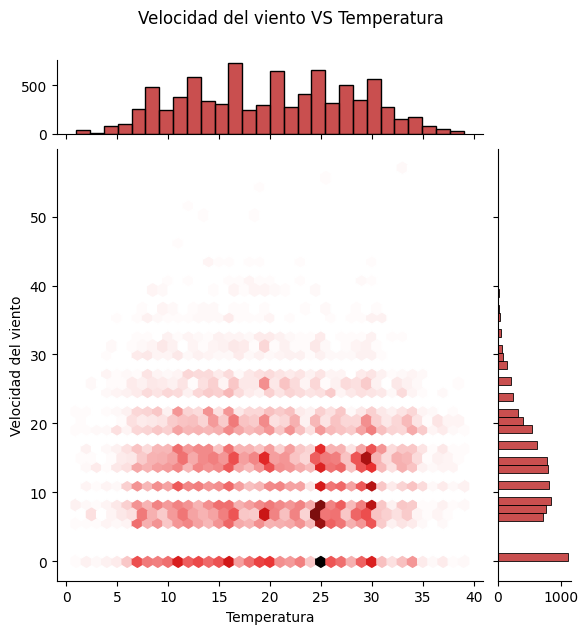

In [15]:
grafico_bivariante(df=df2011, x='temperature', xname = 'Temperatura.', y='wind_speed', yname='Velocidad del viento.', forma='hex', title='Velocidad del viento VS Temperatura.');

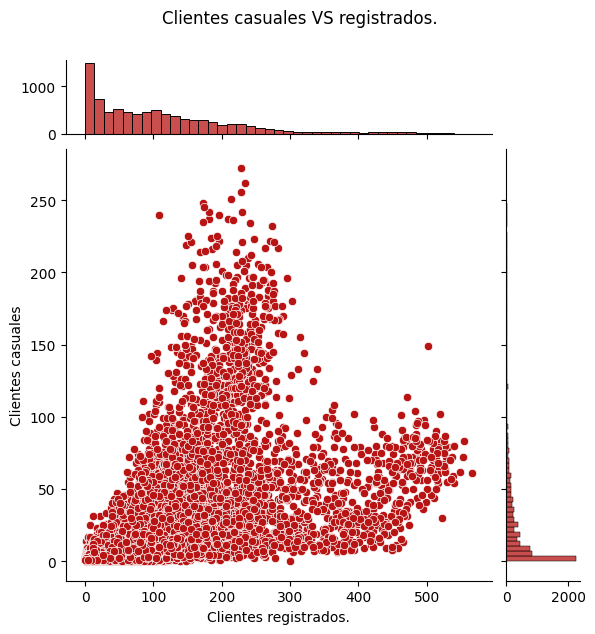

In [16]:
grafico_bivariante(df=df2011, x='registered', xname='Clientes registrados.', y='casual', yname='Clientes casuales.', forma='scatter',title='Clientes casuales VS registrados.');

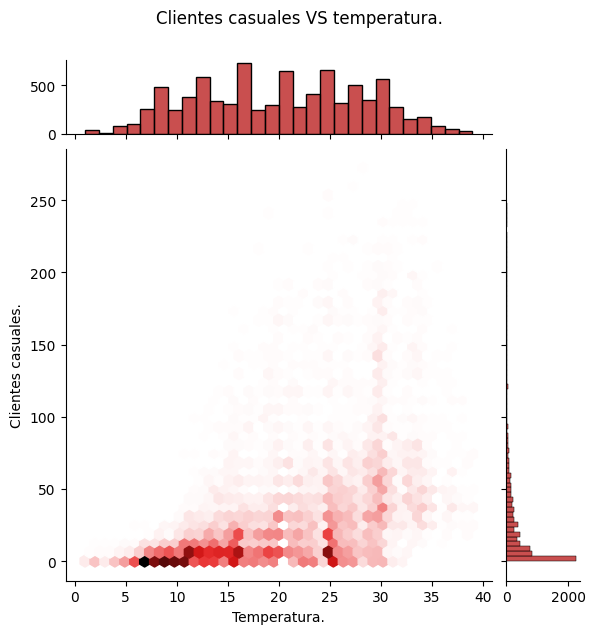

In [23]:
grafico_bivariante(df=df2011, x='temperature', xname='Temperatura.', y='casual', yname='Clientes casuales.', forma='hex', title='Clientes casuales VS temperatura.');

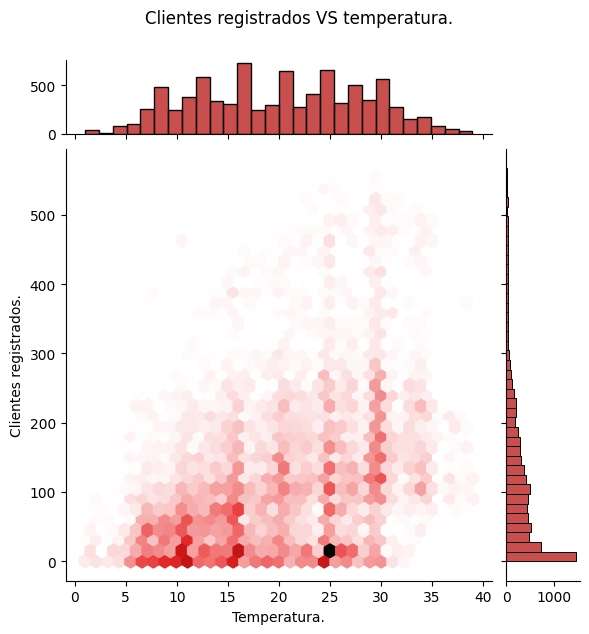

In [24]:
grafico_bivariante(df=df2011, x='temperature', xname='Temperatura.', y='registered', yname='Clientes registrados.', forma='hex', title='Clientes registrados VS temperatura.');

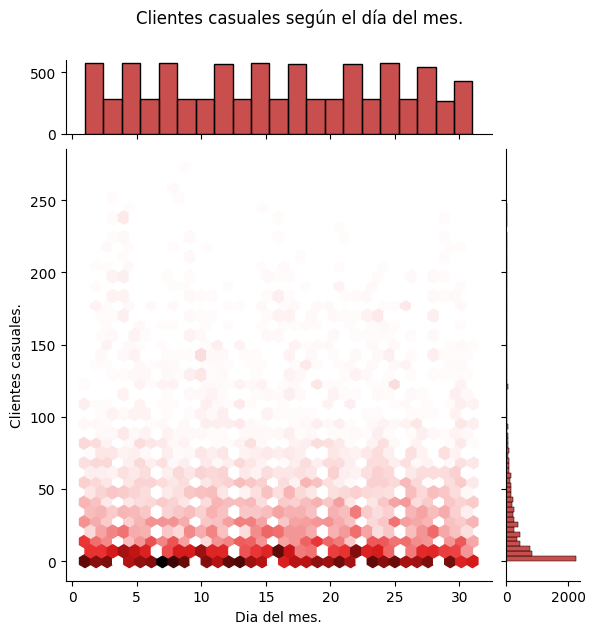

In [25]:
grafico_bivariante(df=df2011, x='day', xname='Dia del mes.', y='casual', yname='Clientes casuales.', forma='hex', title='Clientes casuales según el día del mes.');

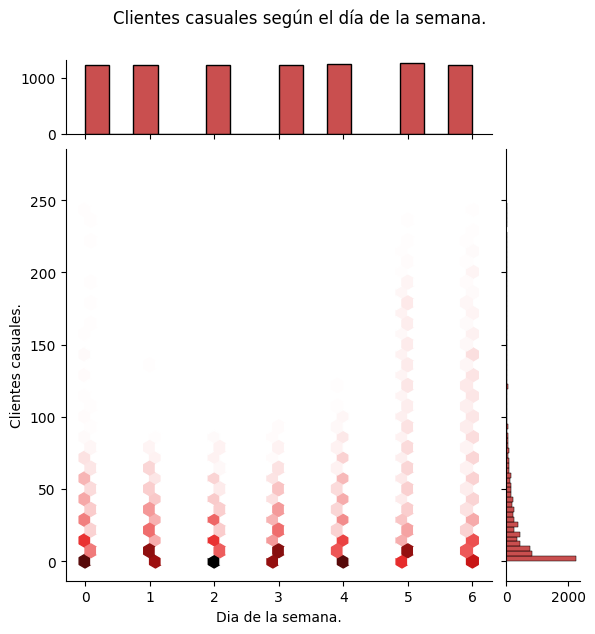

In [26]:
grafico_bivariante(df=df2011, x='weekday', xname='Dia de la semana.', y='casual', yname='Clientes casuales.', forma='hex', title='Clientes casuales según el día de la semana.');

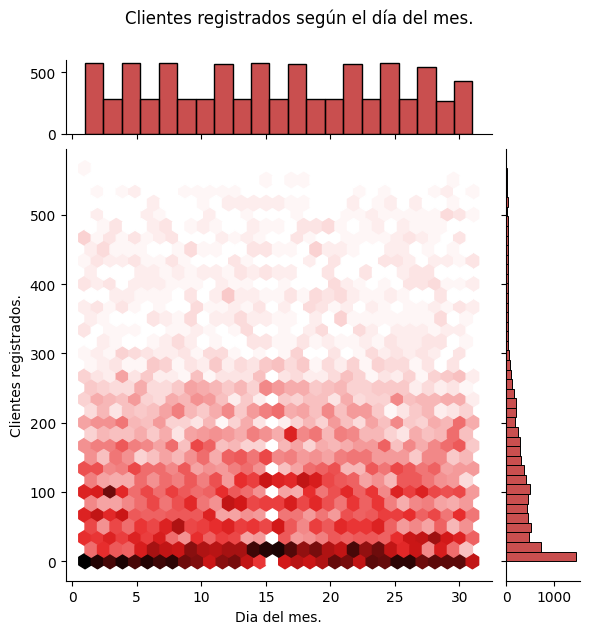

In [27]:
grafico_bivariante(df=df2011, x='day', xname='Dia del mes.', y='registered', yname='Clientes registrados.', forma='hex', title='Clientes registrados según el día del mes.');

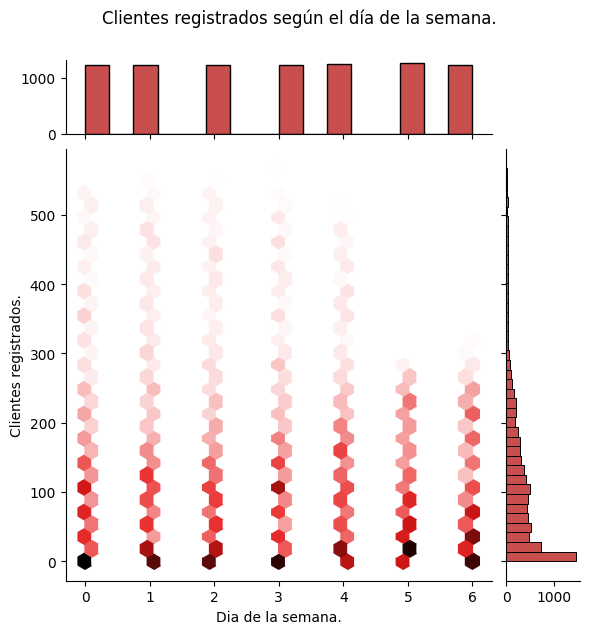

In [28]:
grafico_bivariante(df=df2011,x='weekday', xname='Dia de la semana.', y='registered', yname='Clientes registrados.', forma='hex', title='Clientes registrados según el día de la semana.');

#### *Análisis multivariante*

*La correlación es importante porque nos permite medir la fuerza y la dirección de la relación entre dos variables en un conjunto de datos. Esta métrica nos ayuda a entender cómo cambia una variable cuando la otra variable cambia, lo que es crucial para varios propósitos:*

- **Predicción:** La correlación nos ayuda a predecir el valor de una variable cuando conocemos el valor de otra. Por ejemplo, si sabemos que hay una alta correlación positiva entre la temperatura y la demanda de helados, podemos prever que la demanda de helados aumentará en días más cálidos.

- **Validación de hipótesis:** Nos ayuda a validar o refutar hipótesis sobre la relación entre variables. Si observamos una correlación significativa entre dos variables que se esperaba que estuvieran relacionadas según una hipótesis previa, esto proporciona evidencia a favor de esa hipótesis.

- **Análisis exploratorio:** La correlación es una herramienta valiosa en el análisis exploratorio de datos para entender las relaciones entre variables y descubrir patrones ocultos o asociaciones en los datos.

*La métrica de correlación más comúnmente utilizada es el coeficiente de **correlación de Pearson**, que cuantifica la relación lineal entre dos variables continuas. Este coeficiente puede tomar valores entre -1 y 1, donde -1 indica una correlación negativa perfecta, 1 indica una correlación positiva perfecta y 0 indica ausencia de correlación. El coeficiente de correlación de Pearson es ampliamente utilizado debido a su interpretación intuitiva y su capacidad para medir la fuerza y la dirección de **la relación lineal** entre variables.*

<br>

<div align="center">
  <img src="./img/Correlacion_multivariante.jpg" alt="Breve explicación correlación" width="600px" />
</div>

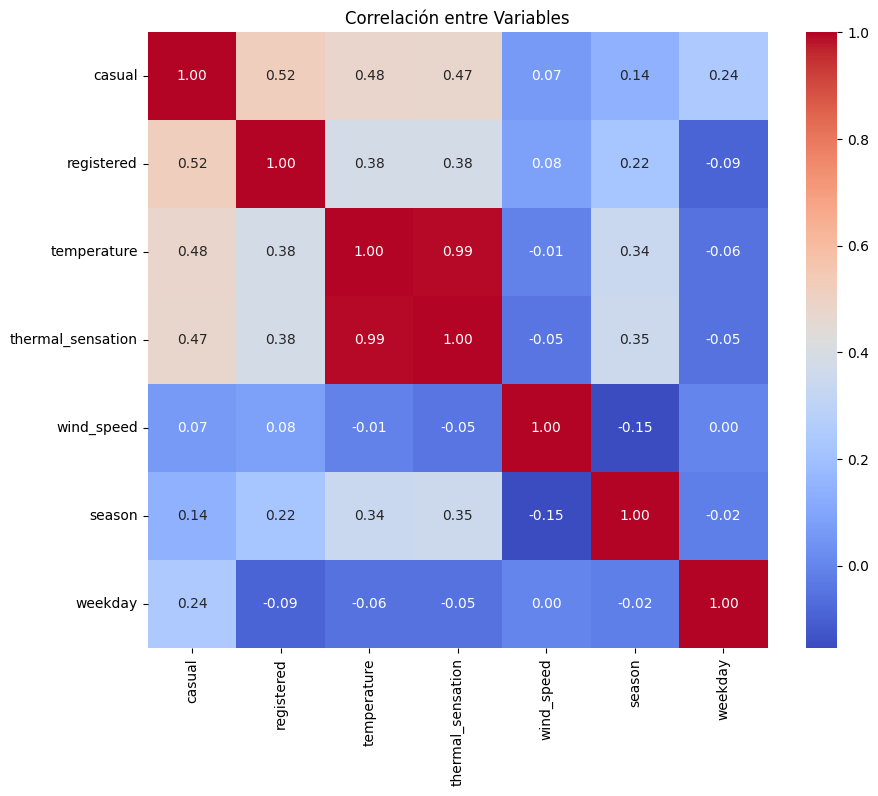

In [29]:
# Mapa de calor (correlación)
correlation_matrix = df2011[['casual','registered', 'temperature', 'thermal_sensation', 'wind_speed', 'season', 'weekday']].corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre Variables')
plt.show()

*Durante nuestro análisis univariante, examinamos varias columnas del conjunto de datos. Al observar la correlación entre estas columnas, notamos que la temperatura y la sensación térmica muestran una correlación positiva perfecta, lo que significa que cuando una aumenta, la otra también aumenta en proporción directa. Por otro lado, las demás variables muestran una correlación moderada, es decir, ni muy fuerte ni muy débil. Esto indica que estas variables tienen alguna relación, pero no tan fuerte como la temperatura y la sensación térmica.*

*****

### -------------------------------------------- Hipótesis ----------------------------------------------------------

****

##### **1**: *Existe una diferencia significativa en el uso promedio de bicicletas entre estaciones cálidas (primavera y verano) y estaciones frías (invierno y otoño).*


In [58]:
df2011.groupby(['season']).agg({'temperature':'median','thermal_sensation':'median'}).rename({1:'Invierno',2:'Primavera',3:'Verano',4:'Otoño'})

,temperature,thermal_sensation
season,,
Invierno,11.0,13.0
Primavera,22.0,26.0
Verano,29.0,33.0
Otoño,17.0,21.0


*Al analizar las estaciones, notamos que las más similares son primavera y otoño. Sin embargo, es importante recordar que la secuencia natural no sigue el orden primavera-otoño o viceversa. Por lo tanto, agrupar estas estaciones juntas podría resultar incorrecto. Para abordar esta cuestión, he decidido combinar invierno con otoño, dado que presentan una diferencia de 6 puntos, mientras que primavera y verano serán agrupados debido a su diferencia de 7 puntos.*

In [26]:
df2011['seasonteam'] = df2011['season'].replace({1:'frio',2:'calido',3:'calido',4:'frio'})
df2011

,dteday,season,mnth,day,hr,weekday,holiday,workingday,temperature,thermal_sensation,humidity,weathersit,wind_speed,casual,registered,cnt,seasonteam
instant,,,,,,,,,,,,,,,,,
1,2011-01-01,1,1,1,0,5,0,0,10.0,14.0,81.0,1,0.0,3,13,16,frio
2,2011-01-01,1,1,1,1,5,0,0,9.0,14.0,80.0,1,0.0,8,32,40,frio
3,2011-01-01,1,1,1,2,5,0,0,9.0,14.0,80.0,1,0.0,5,27,32,frio
4,2011-01-01,1,1,1,3,5,0,0,10.0,14.0,75.0,1,0.0,3,10,13,frio
5,2011-01-01,1,1,1,4,5,0,0,10.0,14.0,75.0,1,0.0,0,1,1,frio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8641,2011-12-31,1,12,31,19,5,0,0,17.0,21.0,54.0,1,15.0,19,73,92,frio
8642,2011-12-31,1,12,31,20,5,0,0,17.0,21.0,54.0,1,15.0,8,63,71,frio
8643,2011-12-31,1,12,31,21,5,0,0,16.0,20.0,58.0,1,13.0,2,50,52,frio


In [27]:
from scipy.stats import mannwhitneyu
# Prueba de Mann-Whitney para dos muestras independientes
stat_mw, p_value_mw = mannwhitneyu(df2011['cnt'][df2011['seasonteam'] == 'frio'],
                                    df2011['cnt'][df2011['seasonteam'] == 'calido'])

# Hipótesis nula (H0): No hay diferencia significativa en el promedio de uso de biciletas entre estaciones frías y cálidas.
# Hipótesis alternativa (Ha): Existe una diferencia significativa en el promedio de uso de bicicletas entre las estaciones frías y cálidas.

print(f"\nPrueba de Mann-Whitney para dos muestras independientes: stat = {stat_mw}, p_value = {p_value_mw}")

if p_value_mw < ALPHA:
    print("Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa en el promedio de uso de bicicletas entre estaciones frías y cálidas")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula. No hay diferencia significativa en el promedio de uso de bicicletas entre estaciones frías y cálidas")


Prueba de Mann-Whitney para dos muestras independientes: stat = 7054605.0, p_value = 4.7389111611635094e-86
Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa en el promedio de uso de bicicletas entre estaciones frías y cálidas


- **Hipótesis Nula (H0)**: Es la afirmación de que no hay diferencia o efecto entre las muestras. Se prueba para ver si podemos rechazarla.

- **Hipótesis Alternativa (Ha)**: Es la afirmación de que hay una diferencia o efecto real en las muestras.

*En resumen, la hipótesis nula asume que cualquier diferencia observada entre las muestras es aleatoria, mientras que la hipótesis alternativa sugiere que hay una diferencia real. La prueba estadística busca evidencia en los datos para decidir si rechazamos la hipótesis nula o no.*

*Por ejemplo, si estamos comparando las medias de dos grupos (como hombres y mujeres) para ver si son diferentes, la hipótesis nula sería que las medias son iguales, y la hipótesis alternativa sería que son diferentes. La prueba de hipótesis determina si hay suficiente evidencia para rechazar la hipótesis nula y aceptar la hipótesis alternativa.*

In [30]:
import plotly.express as px
import pandas as p

h1 = df2011.groupby('seasonteam')[['cnt']].sum().reset_index()
total_uso = df2011['cnt'].sum()
h1['porcentaje'] =  h1['cnt'] * 100 / total_uso

colors = {'calido': '#f78145', 'frio' : '#1b676b'}

# Crear el pie chart
fig = px.pie(h1, values='porcentaje', names=['Estaciones cálidas', 'Estaciones frías'],color='seasonteam',
                color_discrete_map=colors)

fig.update_layout(
    title_text='Promedio de uso de bicicletas',
    title_font=dict(size=30, color='black'),  # Ajustar el tamaño y color del título
    font=dict(family='Arial', size=30, color='black'),  # Ajustar el estilo de la letra
    width=800,  # Ajustar el ancho del gráfico
    height=600,  # Ajustar la altura del gráfico
    margin=dict(l=50, r=50, b=50, t=100),  # Ajustar los márgenes
)

fig.update_traces(textfont_color='white')

# Mostrar el gráfico
fig.show()

KeyError: 'seasonteam'

##### *Highlights sobre el promedio de uso de bicicletas entre las estaciones cálidas y frías:*

*Las **estaciones cálidas** presentan un mayor uso del sistema a nivel promedio que las **estaciones frías**.*

##### **2**: *Existe una diferencia en el promedio de uso entre las estaciones cálidas.*

In [31]:
from scipy.stats import mannwhitneyu
# Prueba de Mann-Whitney para dos muestras independientes
stat_mw, p_value_mw = mannwhitneyu(df2011['cnt'][df2011['season'] == 2],
                                    df2011['cnt'][df2011['season'] == 3])

# Hipótesis nula (H0): No hay diferencia significativa en el promedio de uso de biciletas entre las estaciones primavera y verano.
# Hipótesis alternativa (Ha): Existe una diferencia significativa en el promedio de uso de bicicletas entre las estaciones primavera y verano.

print(f"\nPrueba de Mann-Whitney para dos muestras independientes: stat = {stat_mw}, p_value = {p_value_mw}")

if p_value_mw < ALPHA:
    print("Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa en el promedio de uso de bicicletas entre las estaciones primavera y verano")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula. No hay diferencia significativa en el promedio de uso de bicicletas entre las estaciones primavera y verano")


Prueba de Mann-Whitney para dos muestras independientes: stat = 2176360.5, p_value = 9.950643607180731e-12
Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa en el promedio de uso de bicicletas entre las estaciones primavera y verano


In [32]:
dfH2 = df2011.query('season == 2 or season == 3').groupby(['season','mnth'])['cnt'].mean().reset_index()
dfH2

,season,mnth,cnt
0,2,3,87.842308
1,2,4,131.947149
2,2,5,182.555108
3,2,6,195.387500
4,3,6,207.191667
5,3,7,189.974462
6,3,8,186.991792
7,3,9,175.032381


In [39]:
# Calcula el porcentaje de uso para cada estación
suma_por_season = df2011.query('season == 2 or season == 3').groupby(['season'])['cnt'].sum()
total_uso = df2011.query('season == 2 or season == 3')['cnt'].sum()
porcentaje_por_season = (suma_por_season * 100 ) / total_uso


# Imprime los resultados
print("Porcentaje de uso por estación:\n",round(porcentaje_por_season,2))
print("\nDiferencia porcentual:")
print(round(( (porcentaje_por_season[3] - porcentaje_por_season[2]) / porcentaje_por_season[2] ) * 100, 2))

Porcentaje de uso por estación:
 season
2    45.28
3    54.72
Name: cnt, dtype: float64

Diferencia porcentual:
20.83


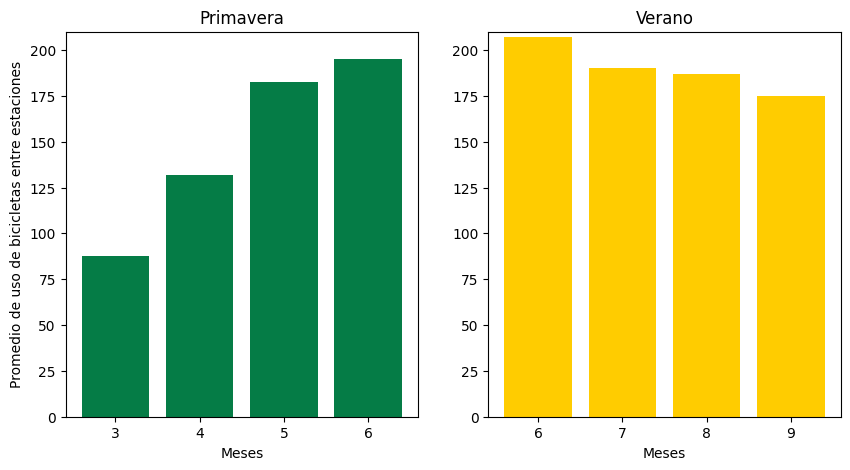

In [34]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
x = dfH2.query('season == 2')['mnth']
y = dfH2.query('season == 2')['cnt']
axs[0].bar(x,y,color='#057c46')
axs[0].set_title('Primavera')

axs[0].set_xlabel('Meses')
axs[0].set_ylabel('Promedio de uso de bicicletas entre estaciones');

x1 = dfH2.query('season == 3')['mnth']
y1 = dfH2.query('season == 3')['cnt']
axs[1].bar(x1,y1,color='#FFCC00')

axs[1].set_title('Verano');
axs[1].set_xlabel('Meses');

y_min = 0  # establecer el límite mínimo deseado
y_max = 210  # establecer el límite máximo deseado
axs[0].set_ylim(y_min, y_max)
axs[1].set_ylim(y_min, y_max);

##### *Highlights sobre el promedio de uso de bicicletas entre las estaciones cálidas:*

*Dentro de las **estaciones cálidas** presentan un mayor uso del sistema a nivel promedio la **temporada de verano** con una diferencia porcentual del 20,83%.*

##### **3**: *Existe una diferencia en el promedio de uso entre las estaciones frías.*

In [35]:
from scipy.stats import mannwhitneyu
# Prueba de Mann-Whitney para dos muestras independientes
stat_mw, p_value_mw = mannwhitneyu(df2011['cnt'][df2011['season'] == 1],
                                    df2011['cnt'][df2011['season'] == 4])

# Hipótesis nula (H0): No hay diferencia significativa en el promedio de uso de biciletas entre las estaciones invierno y otoño.
# Hipótesis alternativa (Ha): Existe una diferencia significativa en el promedio de uso de bicicletas entre las estaciones invierno y otoño.

print(f"\nPrueba de Mann-Whitney para dos muestras independientes: stat = {stat_mw}, p_value = {p_value_mw}")

if p_value_mw < ALPHA:
    print("Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa en el promedio de uso de bicicletas entre las estaciones invierno y otoño")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula. No hay diferencia significativa en el promedio de uso de bicicletas entre las estaciones invierno y otoño")


Prueba de Mann-Whitney para dos muestras independientes: stat = 1411373.5, p_value = 5.733279517481594e-91
Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa en el promedio de uso de bicicletas entre las estaciones invierno y otoño


In [42]:
dfH3_1 = df2011.query('season == 1').groupby('mnth')['cnt'].mean().reset_index()
dfH3_2 = df2011.query('season == 4').groupby('mnth')['cnt'].mean().reset_index()

def desplazar_elementos(lista):
    # Guardar el último elemento en una variable temporal
    temp = lista[-1]
    # Desplazar los elementos hacia la derecha
    for i in range(len(lista)-1, 0, -1):
        lista[i] = lista[i-1]
        
    # Colocar el último elemento en la primera posición
    lista[0] = temp
    return lista

# Llamar a la función para desplazar los elementos
dfH3_1['mnth'] = desplazar_elementos(pd.Categorical(dfH3_1['mnth'], ordered=True))
dfH3_1['cnt'] = desplazar_elementos(list(dfH3_1['cnt']))

print('Temporada de Invierno\n', dfH3_1, "\n")
print('Temporada de Otoño\n',dfH3_2)

Temporada de Invierno
   mnth        cnt
0   12  85.785441
1    1  55.507267
2    2  74.291217
3    3  87.672340 

Temporada de Otoño
    mnth         cnt
0     9  185.031250
1    10  166.232840
2    11  142.095967
3    12  135.277083


In [37]:
# Calcula el porcentaje de uso para cada estación
suma_por_season = df2011.query('season == 1 or season == 4').groupby(['season'])['cnt'].sum()
total_uso = df2011.query('season == 1 or season == 4')['cnt'].sum()
porcentaje_por_season = (suma_por_season * 100 ) / total_uso

# Imprime los resultados
print("\nPorcentaje de uso por estación:")
print(round(porcentaje_por_season,2))
print("\nDiferencia porcentual:")
print(round(( (porcentaje_por_season[1] - porcentaje_por_season[4]) / porcentaje_por_season[4]) * 100, 2))


Porcentaje de uso por estación:
season
1    31.5
4    68.5
Name: cnt, dtype: float64

Diferencia porcentual:
-54.01


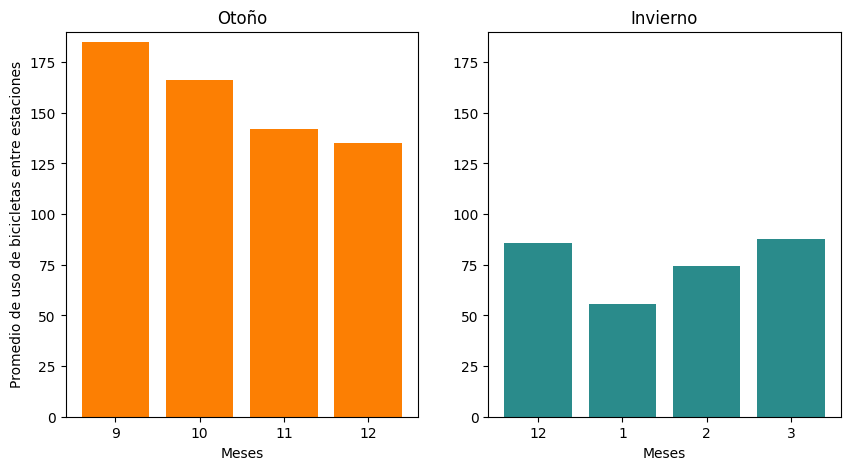

In [38]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

x = dfH3_1['mnth']
y = dfH3_1['cnt']

axs[1].bar(range(len(x)), y, color='#2a8b8b')
axs[1].set_title('Invierno')
axs[1].set_xlabel('Meses')
axs[1].set_xticks(range(len(x)))
axs[1].set_xticklabels(x)


x1 = dfH3_2['mnth']
y1 = dfH3_2['cnt']
axs[0].bar(x1, y1, color='#fc7f03')
axs[0].set_title('Otoño');
axs[0].set_ylabel('Promedio de uso de bicicletas entre estaciones')
axs[0].set_xlabel('Meses');

y_min = 0  # establecer el límite mínimo deseado
y_max = 190  # establecer el límite máximo deseado
axs[1].set_ylim(y_min, y_max)
axs[0].set_ylim(y_min, y_max);

##### *Highlights sobre el promedio de uso de bicicletas entre las estaciones frías:*

*Dentro de las **estaciones frías** presentan un menor uso del sistema a nivel promedio la **temporada de invierno** con una diferencia porcentual del -54,01 % menos respecto del otoño.*

##### **4**: *¿Cómo se manifiesta el comportamiento por tipo de clientes durante la temporada de mayor actividad?*

In [39]:
from scipy.stats import mannwhitneyu
# Prueba de Mann-Whitney para dos muestras independientes
stat_mw, p_value_mw = mannwhitneyu(df2011['casual'][df2011['season'] == 3],
                                    df2011['registered'][df2011['season'] == 3])

# Hipótesis nula (H0): No hay diferencia significativa en el promedio de uso de biciletas entre clientes casuales y registrados durante la estación de verano.
# Hipótesis alternativa (Ha): Existe una diferencia significativa en el promedio de uso de bicicletas entre clientes casuales y registrados durante la estación de verano.

print(f"\nPrueba de Mann-Whitney para dos muestras independientes: stat = {stat_mw}, p_value = {p_value_mw}")

if p_value_mw < ALPHA:
    print("Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa en el promedio de uso de bicicletas entre clientes casuales y registrados durante la estación de verano.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula. No hay diferencia significativa en el promedio de uso de bicicletas entre clientes casuales y registrados durante la estación de verano.")


Prueba de Mann-Whitney para dos muestras independientes: stat = 1106975.0, p_value = 4.187546506314857e-230
Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa en el promedio de uso de bicicletas entre clientes casuales y registrados durante la estación de verano.


In [44]:
dfH4 = df2011.query('season == 3').groupby('mnth').agg({'casual': 'mean', 'registered': 'mean'}).reset_index()
dfH4

,mnth,casual,registered
0,6,42.970833,164.220833
1,7,48.994624,140.979839
2,8,39.231190,147.536252
3,9,37.796190,137.236190


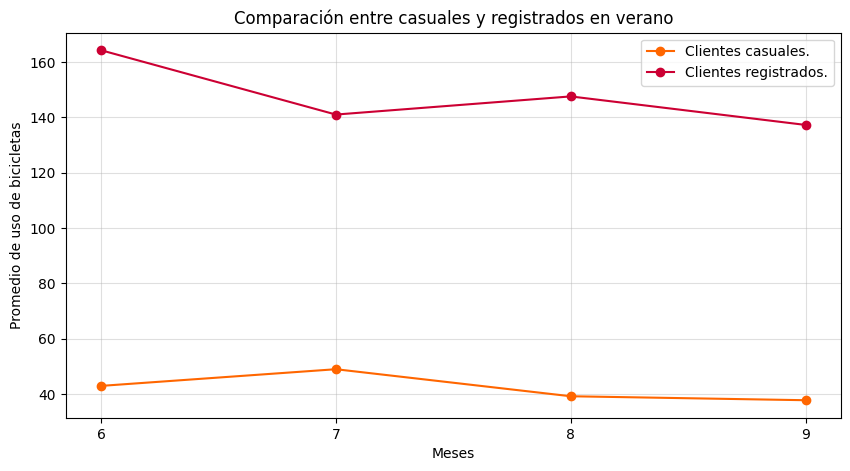

In [55]:
fig = plt.figure(figsize=(10,5))

columna1_data = dfH4['casual']
columna2_data = dfH4['registered']

# Obtén las posiciones de las barras
posiciones = range(len(dfH4))

# Crea el gráfico de líneas
plt.plot(posiciones, columna1_data, marker='o', linestyle='-', color='#FF6600', label='Casual')
plt.plot(posiciones, columna2_data, marker='o', linestyle='-', color='#CC0033', label='Registered')

# Configura las etiquetas y la leyenda
plt.xlabel('Meses')
plt.ylabel('Promedio de uso de bicicletas')
plt.title('Comparación entre casuales y registrados en verano')
plt.xticks(posiciones, dfH4['mnth'])
plt.grid(True, alpha=0.4)
plt.legend(['Clientes casuales.', 'Clientes registrados.'])

# Muestra el gráfico
plt.show()

##### *Highlights sobre el comportamiento de clientes en promedio durante el verano:*

*Dentro de la **temporada de verano** presentan un mayor uso del sistema a nivel promedio **los clientes registrados** llegando al máximo durante el mes de junio. Por otro lado, **los clientes casuales** presentan su máximo de uso durante el mes julio*

##### **5** : *¿Cómo se refleja el comportamiento por tipo de clientes durante la temporada de menor actividad?*

In [42]:
from scipy.stats import mannwhitneyu
# Prueba de Mann-Whitney para dos muestras independientes
stat_mw, p_value_mw = mannwhitneyu(df2011['casual'][df2011['season'] == 1],
                                    df2011['registered'][df2011['season'] == 1])

# Hipótesis nula (H0): No hay diferencia significativa en el promedio de uso de biciletas entre clientes casuales y registrados durante la estación de invierno.
# Hipótesis alternativa (Ha): Existe una diferencia significativa en el promedio de uso de bicicletas entre clientes casuales y registrados durante la estación de invierno.

print(f"\nPrueba de Mann-Whitney para dos muestras independientes: stat = {stat_mw}, p_value = {p_value_mw}")

if p_value_mw < ALPHA:
    print("Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa en el promedio de uso de bicicletas entre clientes casuales y registrados durante la estación de invierno.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula. No hay diferencia significativa en el promedio de uso de bicicletas entre clientes casuales y registrados durante la estación de invierno.")


Prueba de Mann-Whitney para dos muestras independientes: stat = 636154.0, p_value = 0.0
Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa en el promedio de uso de bicicletas entre clientes casuales y registrados durante la estación de invierno.


In [56]:
dfH5 = df2011.query('season == 1').groupby('mnth').agg({'casual': 'mean', 'registered': 'mean'}).reset_index()
dfH5

,mnth,casual,registered
0,1,4.466570,51.040698
1,2,9.617874,64.673344
2,3,19.057447,68.614894
3,12,12.080460,73.704981


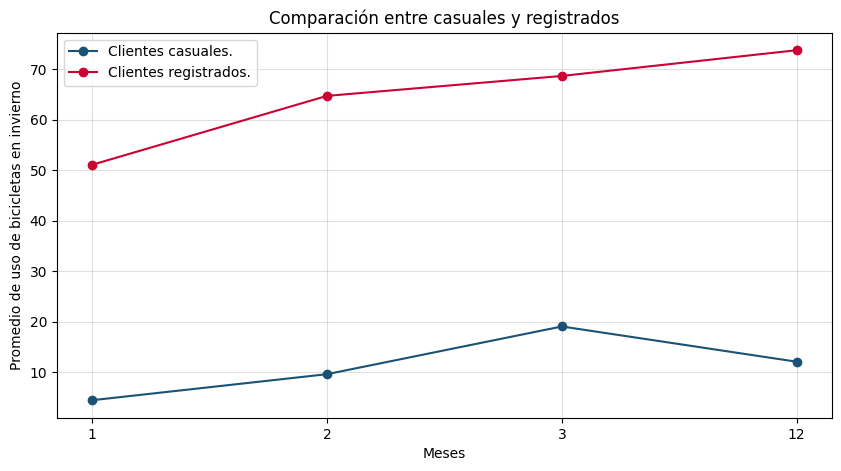

In [58]:
fig = plt.figure(figsize=(10, 5))

columna1_data = dfH5['casual']
columna2_data = dfH5['registered']

# Obtén las posiciones de las líneas
posiciones = range(len(dfH5))

# Crea el gráfico de líneas
plt.plot(posiciones, columna1_data, marker='o', linestyle='-', color='#1A5276', label='Casual')
plt.plot(posiciones, columna2_data, marker='o', linestyle='-', color='#CC0033', label='Registered')

# Configura las etiquetas y la leyenda
plt.xlabel('Meses')
plt.ylabel('Promedio de uso de bicicletas en invierno')
plt.title('Comparación entre casuales y registrados')
plt.xticks(posiciones, dfH5['mnth'])
plt.grid(True, alpha=0.4)
plt.legend(['Clientes casuales.', 'Clientes registrados.'])

plt.show()


##### *Highlights sobre el comportamiento de clientes en promedio durante el invierno:*

*Dentro de la **temporada de invierno** presentan un menor uso del sistema a nivel promedio **los clientes casuales** llegando al mínimo durante el mes de enero al igual que **los clientes registrados**.*

##### **6**: *¿Cómo varía el uso promedio de bicicletas mensualmente durante la temporada de mayor actividad?*

In [60]:
dfH6 = df2011.query('season == 3').groupby(['day']).agg({'casual': 'mean', 'registered': 'mean', 'temperature': 'mean', 'thermal_sensation' : 'mean'}).reset_index()
dfH6

,day,casual,registered,temperature,thermal_sensation
0,1,38.305556,166.458333,29.500000,32.805556
1,2,53.888889,150.152778,29.583333,32.986111
2,3,65.055556,111.430556,28.944444,33.041667
3,4,88.680556,127.416667,29.347222,33.305556
4,5,45.694444,133.222222,29.166667,33.083333
5,6,35.338028,128.507042,27.098592,31.422535
6,7,30.138889,113.930556,28.625000,32.472222
7,8,23.816901,119.957746,28.788732,32.211268
8,9,46.000000,141.250000,29.444444,32.763889
9,10,60.791667,147.625000,29.722222,33.055556


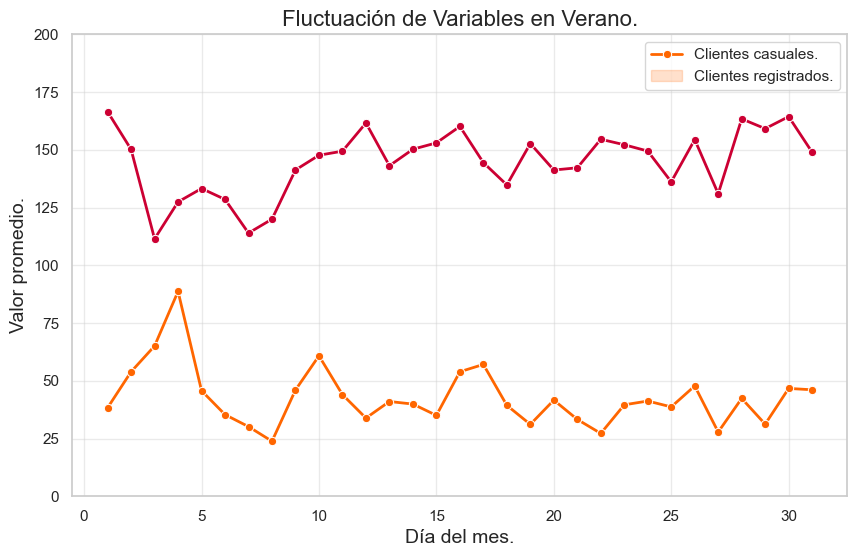

In [63]:
# Crear el lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(x='day', y='casual', data=dfH6, label='casual', color='#FF6600', marker='o', linewidth=2)
sns.lineplot(x='day', y='registered', data=dfH6, label='registered', color='#CC0033', marker='o', linewidth=2)

# Configurar el título y las etiquetas de los ejes
plt.title('Fluctuación de Variables en Verano.', fontsize=16)
plt.xlabel('Día del mes.', fontsize=14)
plt.ylabel('Valor promedio.', fontsize=14)

# Mostrar la leyenda
plt.legend(['Clientes casuales.', 'Clientes registrados.'])
plt.grid(True, alpha=0.4)
plt.ylim(0, 200)

# Mostrar el gráfico
plt.show()

##### *Highlights sobre el comportamiento de clientes en promedio durante los días del mes en verano:*

*Dentro de la **temporada de verano** presentan un mayor uso del sistema a nivel promedio durante el mes **los clientes registrados** .*

##### **7**: *¿Cómo varía el uso promedio de bicicletas mensualmente durante la temporada de menor actividad?*

In [64]:
dfH7 = df2011.query('season == 1').groupby(['day']).agg({'casual': 'mean', 'registered': 'mean', 'temperature': 'mean', 'thermal_sensation': 'mean'}).reset_index()
dfH7

,day,casual,registered,temperature,thermal_sensation
0,1,7.253521,51.845070,11.042254,14.352113
1,2,6.112676,56.718310,13.070423,15.464789
2,3,4.405797,62.028986,7.956522,9.492754
3,4,5.857143,68.628571,9.271429,11.642857
4,5,11.577465,54.366197,11.521127,14.140845
5,6,7.942857,46.828571,11.842857,14.742857
6,7,7.314286,65.457143,9.871429,12.600000
7,8,6.222222,57.972222,9.305556,11.013889
8,9,4.197183,56.619718,7.802817,9.183099
9,10,1.942029,48.521739,9.260870,11.260870


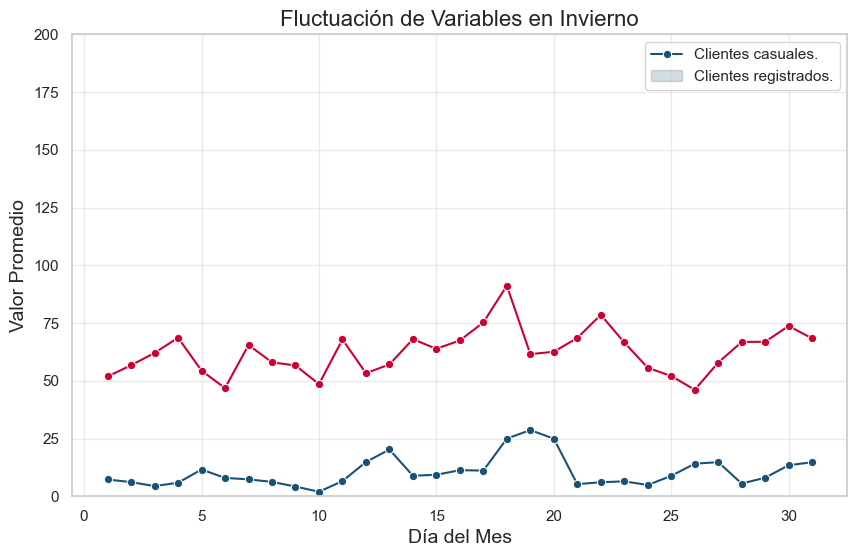

In [67]:
# Crear el lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(x='day', y='casual', data=dfH7, label='casual', color='#1A5276', marker='o')
sns.lineplot(x='day', y='registered', data=dfH7, label='registered', color='#CC0033',  marker='o')

# Configurar el título y las etiquetas de los ejes
plt.title('Fluctuación de Variables en Invierno', fontsize=16)
plt.xlabel('Día del Mes', fontsize=14)
plt.ylabel('Valor Promedio', fontsize=14)

# Mostrar la leyenda
plt.legend(['Clientes casuales.', 'Clientes registrados.'])
plt.grid(True, alpha=0.4)
plt.ylim(0, 200)

# Mostrar el gráfico
plt.show()

#### *Highlights sobre el comportamiento de clientes en promedio durante los días del mes en invierno:*

*Dentro de la **temporada de invierno** presentan un menor uso del sistema a nivel promedio **los clientes casuales**. Podemos observar gracias al gráfico y la tabla que la temperatura durante esas subidas de los clientes casuales se incrementa. Por otro lado, los picos de los clientes registrados parecen decaer por corto plazo y luego aumentar, se podría tratar de insinuar un uso semanal por parte de estos y esas caídas vendrían a ser fines de semana.*

##### **8**: *¿Cómo se comporta el uso promedio de bicicletas por tipo de clientes durante los días de la semana de nuestra temporada de mayor frecuencia?*

In [49]:
dfH8 = df2011.query('season == 3').groupby(['weekday']).agg({'casual': 'mean', 'registered': 'mean'}).reset_index()
dfH8.replace({0 : 'Lunes', 1 : 'Martes', 2: 'Miércoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sábado', 6:'Domingo'}, inplace=True)
dfH8

,weekday,casual,registered
0,Lunes,40.450161,146.237942
1,Martes,30.940299,159.382090
2,Miércoles,27.976190,156.726190
3,Jueves,27.632836,152.310448
4,Viernes,35.673077,152.724359
5,Sábado,69.352941,121.594771
6,Domingo,69.940984,120.606557


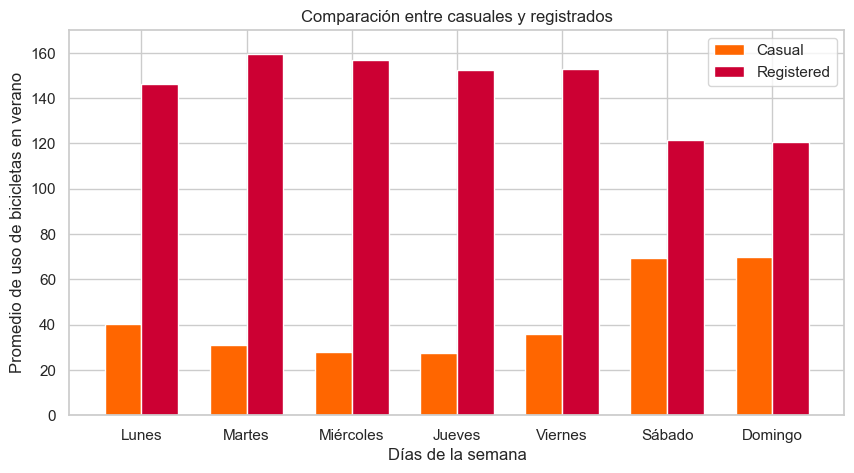

In [50]:
fig = plt.figure(figsize=(10,5))

columna1_data = dfH8['casual']
columna2_data = dfH8['registered']

# Obtén las posiciones de las barras
posiciones = range(len(dfH8))

# Configura el ancho de las barras
ancho_barra = 0.35

# Crea el gráfico de barras
plt.bar(posiciones, columna1_data, width=ancho_barra, label='Casual', color='#FF6600')
plt.bar([pos + ancho_barra for pos in posiciones], columna2_data, width=ancho_barra, label='Registered', color='#CC0033')

# Configura las etiquetas y la leyenda
plt.xlabel('Días de la semana')
plt.ylabel('Promedio de uso de bicicletas en verano')
plt.title('Comparación entre casuales y registrados')
plt.xticks([pos + ancho_barra / 2 for pos in posiciones], dfH8['weekday'])

plt.legend()
plt.ylim(0, 170)
# Muestra el gráfico
plt.show()

##### *Highlights sobre el comportamiento de clientes en promedio durante los días de la semana en verano:*

*Dentro de la **temporada de verano** presentan un comportamiento mayor a nivel promedio **los clientes casuales** durante los fines de semana, mientras que **los clientes registrados** los días hábiles de la semana.*

##### **9**: *¿Cómo se comporta el uso promedio de bicicletas por tipo de clientes durante los días de la semana de nuestra temporada de mayor frecuencia?*

In [51]:
dfH9 = df2011.query('season == 1').groupby(['weekday']).agg({'casual': 'mean', 'registered': 'mean'}).reset_index()
dfH9.replace({0 : 'Lunes', 1 : 'Martes', 2: 'Miércoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sábado', 6:'Domingo'}, inplace=True)
dfH9

,weekday,casual,registered
0,Lunes,7.296429,56.989286
1,Martes,5.764259,65.908745
2,Miércoles,6.122034,72.725424
3,Jueves,6.086207,74.200000
4,Viernes,10.726073,74.590759
5,Sábado,17.332335,49.056886
6,Domingo,17.346535,43.980198


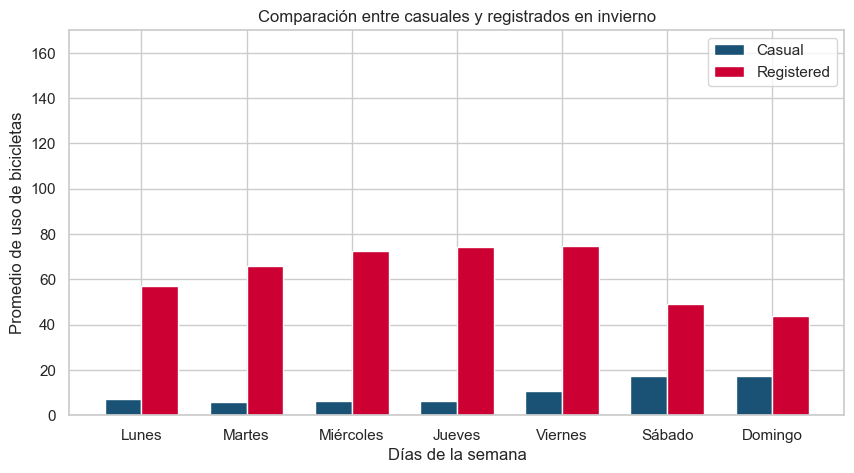

In [52]:
fig = plt.figure(figsize=(10,5))

columna1_data = dfH9['casual']
columna2_data = dfH9['registered']

# Obtén las posiciones de las barras
posiciones = range(len(dfH9))

# Configura el ancho de las barras
ancho_barra = 0.35

# Crea el gráfico de barras
plt.bar(posiciones, columna1_data, width=ancho_barra, label='Casual', color='#1A5276')
plt.bar([pos + ancho_barra for pos in posiciones], columna2_data, width=ancho_barra, label='Registered', color='#CC0033')

# Configura las etiquetas y la leyenda
plt.xlabel('Días de la semana')
plt.ylabel('Promedio de uso de bicicletas')
plt.title('Comparación entre casuales y registrados en invierno')
plt.xticks([pos + ancho_barra / 2 for pos in posiciones], dfH9['weekday'])
plt.legend()

plt.ylim(0, 170)
# Muestra el gráfico
plt.show()


### *Highlights sobre el comportamiento de clientes en promedio durante los días de la semana en invierno:*

*Dentro de la **temporada de invierno** presentan un comportamiento mayor a nivel promedio **los clientes casuales** durante los fines de semana, mientras que **los clientes registrados** los días hábiles de la semana.*

******


#### ----------------------------------------------------- *Highlights a nivel global*--------------------------------------------------------


******

#####  1. *Las estaciones cálidas serán nuestras temporadas de mayor movimiento, extendiendosé un poco más al otoño. Se aplicarían para estos, trabajos temporales durante dichas estaciones.*
#####  2. *Para nivelar nuestras estaciones cálidas y lograr compensar las grandes caídas durante las temporadas frías, propondría algunas promociones durante la estación de primavera para nuestros clientes registrados.*
#####  3. *Tendremos grandes potenciales de clientes casuales durante los días festivos para atraerlos a nuestra empresa.*
#####  4. *Se espera una caída importante durante el mes de enero, por parte de ambos clientes.* 
#####  5. *Establece colaboraciones con empresas locales, como cafeterías, restaurantes o tiendas, para ofrecer descuentos cruzados durante nuestra temporada de menor actividad, con el fin de fomentar la sinergia entre negocios locales y aumentar la visibilidad del servicio.*
#####  6. *Nuestros clientes registrados utilizan el sistema en mayor medida durante la semana, por lo que yo pondría las promociones durante el lunes que es cuando se arranca o un miércoles para contrarestar esa flojera del inicio semanal.*
#####  7. *Nuestros clientes casuales por otro lado presentan un aumento durante los fines de semana, por lo que pondría algún cupo familiar o de amigos y lograr contrarestar esa caída semanal.*
#####  8. *Programas de Lealtad: Implementa un programa de lealtad para clientes registrados que ofrezca recompensas, descuentos exclusivos o beneficios acumulativos. Esto podría incentivar el uso continuo de bicicletas a lo largo del año, incluso durante las temporadas más bajas.*
#####  9. *Organizar eventos especiales o colabora con eventos locales, como festivales, carreras, o actividades culturales. Esto podría atraer tanto a clientes casuales como a registrados, generando interés adicional y aumentando la demanda en momentos clave.*


*****

##### -----------------------------------------------------  *Investigaciones futuras:*  ------------------------------------------------------------------


****

- 1. *Personalizar aún más a nivel horario el comportamiento por parte de nuestros clientes.*
- 2. *Utilizar información de clientes para agrupar en grupos más específicos como, sexo, duración, año de nacimiento.*
- 3. *Expandir nuestra investigación a nivel geográfico, con el fin de ajustar las estaciones de bicicletas con mayor precisión y como este análisis en base a la demanda.*